# Collaboration and Competition

---

This notebook presents my solution to the Collaboration and Competition [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Methodology

#### 1.1 Proximal Policy Optimization

After brief research I opted to implement a Proximal Policy Optimization algorithm to solve the environment. In 2017 it was considered the standard algorithm of [Open AI](https://blog.openai.com/openai-baselines-ppo/) for reinforcement learning because it accomplishes the stability and robustness of Trust Region Policy Optimization with higher simplicity and flexibility. Furthermore, it was used by [Open AI to train a team of Dota Agents through self-play](https://blog.openai.com/openai-five/).

The method defines a surrogate objective function to be used in the optimization scheme. The surrogate function is designed to minimize the distance between the old policy $\Pi_{old}$ and the new policy $\Pi$. Denoting the ratio of the policies as :

$$r(θ)=\frac{\Pi_{\theta}(a|s)}{\Pi_{\theta}^{old}(a|s)}$$

The surrogate objective function is defined as : 

$$ J(θ)=E[min(r(θ)A_{\theta}^{old}(s,a),clip(r(θ),1−\epsilon,1+\epsilon)A_{\theta}^{old}(s,a))] $$

In the last formula, A stands for advantage. To minimize the large policy deviations between steps, the distance $r$ is clipped so that in each update it stays within the bounded region $[1-\epsilon, 1+\epsilon]$, therefore making a pessimistic guess on the policy gradient.

The algorithm works as follows :
0. Initialize the networks with random parameters $\theta$
1. Collect experiences with the policy and save to the buffer
2. Estimate the advantages
3. Run gradient ascent step to update parameters $\theta$
4. Repeat steps 1 to 4 until convergence

#### 1.2 Training parameters

The network architecture used in this work is comprised of two fully connected layers of 64 units with tanh activation for both  the policy and critic. 
The head of the policy network outputs uses tanh for activation function and outputs the Gaussian means, while the standard deviation is set to 1 in all dimensions. 
For the critic network, no activation is used in the last layer.

The hyperparameters used to train the network were :

1. GAMMA = 0.99            # discount factor
2. LR = 5.0e-4             # learning rate 
3. CLIP_RANGE = 0.20       # deviation to the old policy
4. GRAD_CLIP = 5           # gradient clipping
5. NUM_EPOCHS = 10         # number of batch passes
6. BATCH_SIZE = 256        # number of points in each mini batch


### 2. Training the agent
```

In [1]:
import numpy as np
from envwrapper import EnvWrapper
from torch.autograd import Variable

from model import ActorCriticNet
from agent import PPO_Agent

env = EnvWrapper('env/Tennis.exe')

state = env.reset()
policy = ActorCriticNet(state.shape[-1], env.nA, 1)
agent = PPO_Agent(policy, max_tsteps=512)
agent.train(env, max_episodes=256)
agent.save()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of actions: 2
Number of agents: 2
States look like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
State space dimension: 24


c:\program files\python36\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode   0 of 256 Avg/Last/Min/Max Score : 0.28/0.28/0.28/0.28.
Episode   1 of 256 Avg/Last/Min/Max Score : 0.25/0.21/0.21/0.28.
Episode   2 of 256 Avg/Last/Min/Max Score : 0.33/0.51/0.21/0.51.
Episode   3 of 256 Avg/Last/Min/Max Score : 0.32/0.26/0.21/0.51.
Episode   4 of 256 Avg/Last/Min/Max Score : 0.33/0.39/0.21/0.51.
Episode   5 of 256 Avg/Last/Min/Max Score : 0.32/0.29/0.21/0.51.
Episode   6 of 256 Avg/Last/Min/Max Score : 0.33/0.37/0.21/0.51.
Episode   7 of 256 Avg/Last/Min/Max Score : 0.33/0.35/0.21/0.51.
Episode   8 of 256 Avg/Last/Min/Max Score : 0.36/0.60/0.21/0.60.
Episode   9 of 256 Avg/Last/Min/Max Score : 0.34/0.17/0.17/0.60.
Episode  10 of 256 Avg/Last/Min/Max Score : 0.35/0.40/0.17/0.60.
Episode  11 of 256 Avg/Last/Min/Max Score : 0.33/0.15/0.15/0.60.
Episode  12 of 256 Avg/Last/Min/Max Score : 0.34/0.50/0.15/0.60.
Episode  13 of 256 Avg/Last/Min/Max Score : 0.33/0.19/0.15/0.60.
Episode  14 of 256 Avg/Last/Min/Max Score : 0.32/0.12/0.12/0.60.
Episode  15 of 256 Avg/La

Episode 127 of 256 Avg/Last/Min/Max Score : 0.49/0.55/0.01/0.99.
Episode 128 of 256 Avg/Last/Min/Max Score : 0.49/0.64/0.01/0.99.
Episode 129 of 256 Avg/Last/Min/Max Score : 0.49/0.38/0.01/0.99.
Episode 130 of 256 Avg/Last/Min/Max Score : 0.50/0.56/0.01/0.99.
Episode 131 of 256 Avg/Last/Min/Max Score : 0.50/0.46/0.01/0.99.
Episode 132 of 256 Avg/Last/Min/Max Score : 0.50/0.53/0.01/0.99.
Episode 133 of 256 Avg/Last/Min/Max Score : 0.51/0.66/0.16/0.99.
Episode 134 of 256 Avg/Last/Min/Max Score : 0.51/0.76/0.16/0.99.
Episode 135 of 256 Avg/Last/Min/Max Score : 0.51/0.76/0.16/0.99.
Episode 136 of 256 Avg/Last/Min/Max Score : 0.51/0.59/0.16/0.99.
Episode 137 of 256 Avg/Last/Min/Max Score : 0.52/0.66/0.16/0.99.
Episode 138 of 256 Avg/Last/Min/Max Score : 0.52/0.47/0.16/0.99.
Episode 139 of 256 Avg/Last/Min/Max Score : 0.52/0.66/0.16/0.99.
Episode 140 of 256 Avg/Last/Min/Max Score : 0.53/0.74/0.16/0.99.
Episode 141 of 256 Avg/Last/Min/Max Score : 0.52/0.34/0.16/0.99.
Episode 142 of 256 Avg/La

Episode 254 of 256 Avg/Last/Min/Max Score : 0.65/0.64/0.34/0.97.
Episode 255 of 256 Avg/Last/Min/Max Score : 0.64/0.45/0.34/0.97.


In [2]:
env.close()

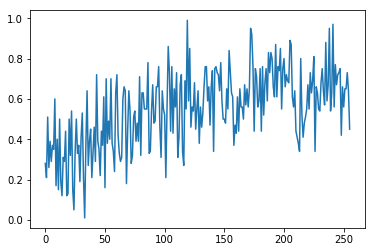

In [4]:
import numpy as np
import matplotlib.pyplot as plt
results = np.loadtxt('log.txt')
plt.plot(results)
plt.show()

### 3. Improvements and future work

As it can be seen, the agent trains steadily, but it takes a 130 steps to converge. One way to speed up the training process is to implement advantage normalization to reduce the gradient variance and improve the signal to noise ratio.

Another important improvement to the PPO framework is the use of Generalized Advantage Estimation, which could be seen as a "higher order" advantage estimation.

Other frameworks could also be implemented, such as DDPG or the more recent D4PG could also be tested.